In [1]:
import sys;sys.path.append("..")
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from devml.post_processing import (git_churn_df, file_len, git_populate_file_metatdata)

In [3]:
df = git_churn_df(path="/tmp/checkout/flask")

2017-10-15 10:39:19,669 - devml.post_processing - INFO - Running churn cmd: [git log --name-only --pretty=format:] at path [/tmp/checkout/flask]


In [4]:
df.head()

,files,churn_count
0,b'docs/logging.rst',2
1,b'docs/patterns/fileuploads.rst',29
2,b'docs/cli.rst',25
3,b'docs/installation.rst',55
4,b'flask/cli.py',75


In [5]:
metadata_df = git_populate_file_metatdata(df)

In [6]:
metadata_df.sort_values(by="churn_count", ascending=False).head(10)

,files,churn_count,line_count,extension,relative_churn
1,b'flask/app.py',316,2183.0,.py,0.14
2,b'CHANGES',306,769.0,,0.40
3,b'flask/helpers.py',176,1019.0,.py,0.17
4,b'docs/quickstart.rst',128,846.0,.rst,0.15
5,b'tests/flask_tests.py',127,NaN,.py,NaN
6,b'docs/api.rst',117,828.0,.rst,0.14
7,b'flask.py',104,NaN,.py,NaN
8,b'setup.py',80,112.0,.py,0.71
9,b'docs/config.rst',76,591.0,.rst,0.13
10,b'flask/cli.py',75,759.0,.py,0.10


In [7]:
metadata_df.median()

churn_count        2.00
line_count        53.00
relative_churn     0.15
dtype: float64

In [10]:
metadata_df.groupby("extension").median()

,churn_count,line_count,relative_churn
extension,,,
,4.5,36.0,0.375
.bat,1.0,139.0,0.010
.cfg,3.0,2.0,1.250
.conf,2.0,NaN,NaN
.coveragerc,1.0,11.0,0.090
.css,1.0,10.0,0.280
.css_t,12.0,NaN,NaN
.egg,2.0,NaN,NaN
.gitattributes,1.0,1.0,1.000


In [11]:
metadata_df.groupby("extension").describe()

churn_count                                                  \
                     count       mean        std   min    25%   50%    75%   
extension                                                                    
                      16.0  27.250000  74.919067   1.0   1.00   4.5  17.25   
.bat                   1.0   1.000000        NaN   1.0   1.00   1.0   1.00   
.cfg                   3.0   6.333333   7.571878   1.0   2.00   3.0   9.00   
.conf                  1.0   2.000000        NaN   2.0   2.00   2.0   2.00   
.coveragerc            1.0   1.000000        NaN   1.0   1.00   1.0   1.00   
.css                  14.0   1.428571   0.646206   1.0   1.00   1.0   2.00   
.css_t                 1.0  12.000000        NaN  12.0  12.00  12.0  12.00   
.egg                   1.0   2.000000        NaN   2.0   2.00   2.0   2.00   
.gitattributes         1.0   1.000000        NaN   1.0   1.00   1.0   1.00   
.gitignore             1.0  12.000000        NaN  12.0  12.00  12.0  12.00   
.gitmodules            1.0   3.000000        NaN   3.0   3.00   3.0   3.00   
.html                 66.0   2.090909   1.803648   1.0   1.00   2.0   2.00   
.ico                   1.0   1.000000        NaN   1.0   1.00   1.0   1.00   
.in                    3.0   3.333333   4.041452   1.0   1.00   1.0   4.50   
.inc                   1.0  26.000000        NaN  26.0  26.00  26.0  26.00   
.ini                   1.0  44.000000        NaN  44.0  44.00  44.0  44.00   
.js                    1.0   3.000000        NaN   3.0   3.00   3.0   3.00   
.json                  2.0   1.500000   0.707107   1.0   1.25   1.5   1.75   
.md                    2.0   2.000000   0.000000   2.0   2.00   2.0   2.00   
.pdf                   1.0   2.000000        NaN   2.0   2.00   2.0   2.00   
.png                  13.0   2.307692   0.480384   2.0   2.00   2.0   3.00   
.py                  204.0  12.509804  30.449423   1.0   1.00   2.0  11.00   
.rst                  91.0  17.560440  20.835978   1.0   6.00  13.0  22.50   
.rst~                  1.0   2.000000        NaN   2.0   2.00   2.0   2.00   
.sql                   4.0   1.750000   0.957427   1.0   1.00   1.5   2.25   
.sty                   1.0   6.000000        NaN   6.0   6.00   6.0   6.00   
.svg                   2.0   1.500000   0.707107   1.0   1.25   1.5   1.75   
.txt                  19.0   1.736842   1.284182   1.0   1.00   1.0   2.00   
.yml                   1.0  30.000000        NaN  30.0  30.00  30.0  30.00   

                      line_count              ...                   \
                  max      count        mean  ...      75%     max   
extension                                     ...                    
                306.0       14.0   83.642857  ...    46.75   769.0   
.bat              1.0        1.0  139.000000  ...   139.00   139.0   
.cfg             15.0        3.0    5.333333  ...     7.00    12.0   
.conf             2.0        0.0         NaN  ...      NaN     NaN   
.coveragerc       1.0        1.0   11.000000  ...    11.00    11.0   
.css              3.0        4.0   49.750000  ...    58.00   178.0   
.css_t           12.0        0.0         NaN  ...      NaN     NaN   
.egg              2.0        0.0         NaN  ...      NaN     NaN   
.gitattributes    1.0        1.0    1.000000  ...     1.00     1.0   
.gitignore       12.0        1.0   21.000000  ...    21.00    21.0   
.gitmodules       3.0        0.0         NaN  ...      NaN     NaN   
.html            13.0       27.0   10.740741  ...    18.00    49.0   
.ico              1.0        1.0    5.000000  ...     5.00     5.0   
.in               8.0        3.0    5.666667  ...     7.00    11.0   
.inc             26.0        1.0   63.000000  ...    63.00    63.0   
.ini             44.0        1.0   66.000000  ...    66.00    66.0   
.js               3.0        0.0         NaN  ...      NaN     NaN   
.json             2.0        1.0    4.000000  ...     4.00     4.0   
.md               2.0        0.0         NaN  ..

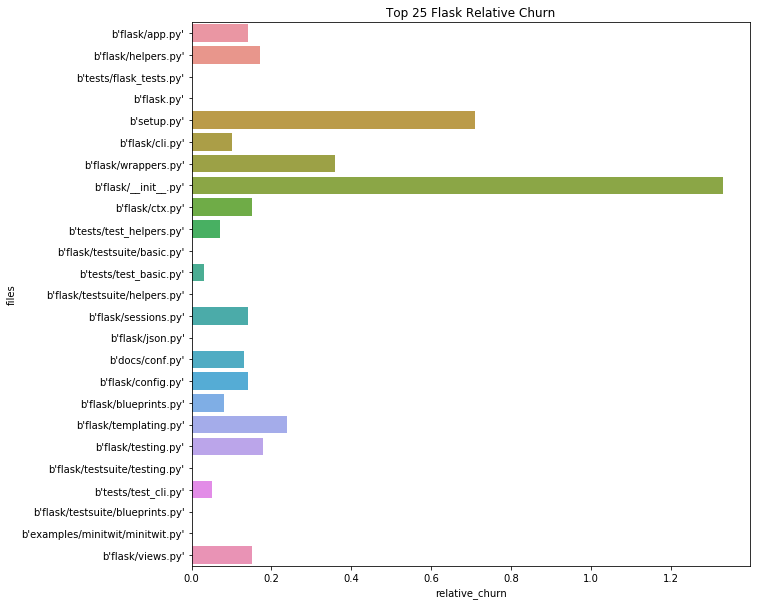

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
python_files = metadata_df[metadata_df.extension == ".py"]
sns.barplot(y="files", x="relative_churn",data=python_files.sort_values(by="churn_count", ascending=False).head(25))
plt.title('Top 25 Flask AbsoluteRelative Churn')
plt.show()